In [1]:
from atFunction import *


In [25]:
dir(at)

['ABC',
 'ACMode',
 'All',
 'Aperture',
 'AtError',
 'AtWarning',
 'AxisCode',
 'AxisDef',
 'BLMode',
 'BeamLoadingElement',
 'BeamMoments',
 'Bend',
 'CLASS_MAP',
 'Callable',
 'Collective',
 'Collimator',
 'Constraints',
 'Corrector',
 'DConstant',
 'Dipole',
 'Drift',
 'ELossMethod',
 'Element',
 'ElementConstraints',
 'ElementVariable',
 'End',
 'Enum',
 'EnvelopeConstraints',
 'Frf',
 'Generator',
 'GridMode',
 'InsertionDeviceKickMap',
 'IntEnum',
 'Iterable',
 'Lattice',
 'LinoptConstraints',
 'List',
 'LongElement',
 'LongResonatorElement',
 'LongtMotion',
 'M66',
 'Marker',
 'Monitor',
 'Multipole',
 'Octupole',
 'Optional',
 'Orbit',
 'OrbitConstraints',
 'Particle',
 'Quadrupole',
 'QuantumDiffusion',
 'RFCavity',
 'Radiative',
 'Refpts',
 'ResWallElement',
 'ResonatorElement',
 'RingParameters',
 'Sequence',
 'Sextupole',
 'ThinMultipole',
 'Tuple',
 'Union',
 'Variable',
 'VariableMultipole',
 'Wake',
 'WakeComponent',
 'WakeElement',
 'WakeType',
 'Wiggler',
 '__builtins_

In [2]:
E0 = 3e9 #Energy GeV
L0 = 5.78400128e2 #Circumference meter
C0 = 299792458 #speed of light m/s
HarmNum = 328

aper = at.Aperture('AP', [-0.05,0.05,-0.05,0.05])
# Markers
BPM     = at.Monitor('BPM');
GIRDER  = at.Marker('GIRDER');

CAV = at.RFCavity('CAV', 0, 500.00000e+06, HarmNum*C0/L0, HarmNum, energy=E0);
#quadrupoles
q1 = at.Quadrupole('q1',0.12, 6.498710)
q2  = at.Quadrupole('q2',0.12,-8.097841)
q3 = at.Quadrupole('q3',0.12, 5.344311)
q4 = at.Quadrupole('q4',0.15, 10.00000)
q5  = at.Quadrupole('q5',0.12, -6.590778)

#Drifts
long   =    at.Drift('long' ,2.52220);
db     =    at.Drift('db' ,0.120000);
d1     =    at.Drift('d1' ,0.130000);
d2     =    at.Drift('d2' ,0.110000);
d3     =    at.Drift('d3',0.110000);
d4     =    at.Drift('d4' ,0.100000);
d5     =    at.Drift('d5',0.351402);
d6     =    at.Drift('d6',0.150000);
d7     =    at.Drift('d7',0.150000);
d8     =    at.Drift('d8',0.150000);
d9     =    at.Drift('d9',0.150000);
d10    =    at.Drift('d10',0.120000);

# Bending magnets
import math
rb     =  at.Dipole('rb'  , 0.200000, math.radians(-0.15000) , 4.850000,FullGap=0.05,FringeQuadEntrance =1);
bq     =  at.Dipole('bq'  , 0.200000, math.radians(0.200000) , -4.850000,FringeQuadEntrance = 1);
bc     =  at.Dipole('bc'  , 1.200000, math.radians(2.612000) , 0.421000);
bmat   =  at.Dipole('bmat', 0.800000, math.radians(1.758000) , -0.522199); 

#Sextupoles
s1     =    at.Sextupole('s1' , 0.120000 , 0)#193.070008);
s2     =    at.Sextupole('s2' , 0.150000 ,0)#-202.3659913);
s3     =    at.Sextupole('s3' , 0.120000 ,0)#18.333333);
s4     =    at.Sextupole('s4' , 0.150000 ,0)#-29.333333);
s5     =    at.Sextupole('s5' , 0.150000 ,0.000000 );

bend   =   [ bq, db, bc, db, bq];
Lcell  =  [s1 ,d1, rb, d2, BPM , s2, d3, bend, d3,s2, BPM, d2, rb, d1, s1];
imatch =   [ bmat, d5, s4, d5, q1, d4, s3];
rimatch=   [ s3, d4, q1, d5, s4, d5, bmat];
fmatch =   [ long, BPM, s5, d10, q5, d9, q4, d8, q3, d7, q2, d6];
rfmatch=   [ d6, q2, d7, q3, d8, q4, d9, q5, d10, s5, BPM, long];
match  =   [ fmatch ,imatch];
rmatch =   [ rimatch ,rfmatch];
seven  =   [Lcell, Lcell, Lcell, Lcell, Lcell, Lcell, Lcell ];
mba    =   at.Lattice( [GIRDER, long, BPM, s5, d10, q5, d9, q4, d8, q3, d7, q2, d6,
                        bmat, d5, s4, d5, q1, d4, s3, GIRDER, GIRDER,
                        s1 ,d1, rb, d2, BPM , s2, d3,  bq, db, bc, db, bq, d3,s2, BPM, d2, rb, d1, s1,
                        s1 ,d1, rb, d2, BPM , s2, d3,  bq, db, bc, db, bq, d3,s2, BPM, d2, rb, d1, s1,
                        s1 ,d1, rb, d2, BPM , s2, d3,  bq, db, bc, db, bq, d3,s2, BPM, d2, rb, d1, s1,
                        s1 ,d1, rb, d2, BPM , s2, d3,  bq, db, bc, db, bq, d3,s2, BPM, d2, rb, d1, s1,
                        s1 ,d1, rb, d2, BPM , s2, d3,  bq, db, bc, db, bq, d3,s2, BPM, d2, rb, d1, s1,
                        s1 ,d1, rb, d2, BPM , s2, d3,  bq, db, bc, db, bq, d3,s2, BPM, d2, rb, d1, s1,
                        s1 ,d1, rb, d2, BPM , s2, d3,  bq, db, bc, db, bq, d3,s2, BPM, d2, rb, d1, s1 ,
                        GIRDER, GIRDER, s3, d4, q1, d5, s4, d5, bmat ,
                        d6, q2, d7, q3, d8, q4, d9, q5, d10, s5, BPM, long, GIRDER],name='MBA lattice',
                        energy=E0, beam_current =0.22,periodicity=16);

SR = at.Lattice(mba*16)
print(mba[1]),len(SR)

In [12]:
#print('d10: \n', d10,'\n bq length / bq bend angle: \n', bq.Length/bq.BendingAngle, 
#      '\n q3: \n',q3,'\n cavity: \n', CAV,'\n bpm: \n', BPM,'\n Girder: \n',GIRDER )

Drift:
	FamName : d7
	Length : 0.15
	PassMethod : DriftPass


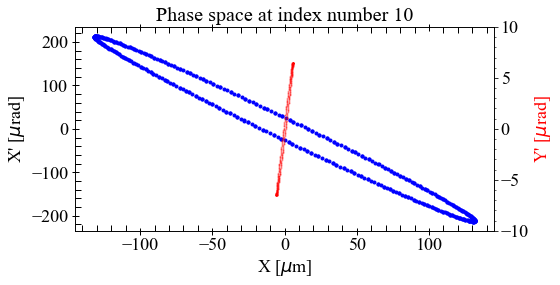

In [5]:
nturns=500
ref=10
lat_pas(SR,nturns, ref, save = False)

Drift:
	FamName : db
	Length : 0.12
	PassMethod : DriftPass


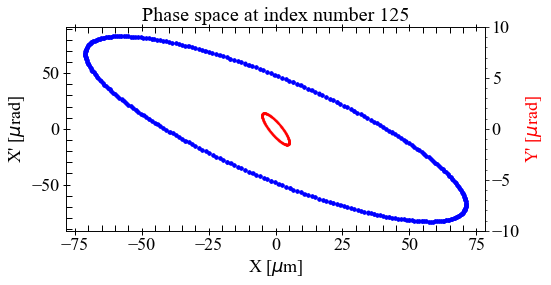

In [6]:
nturns = 1000
ref = 125
lat_pas(SR, nturns, ref, save = False)    

Drift:
	FamName : d1
	Length : 0.13
	PassMethod : DriftPass


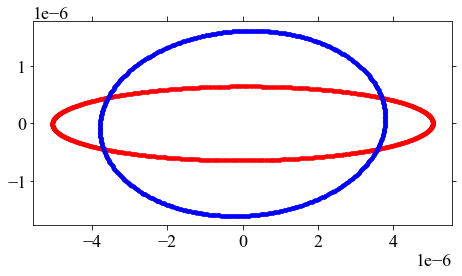

In [7]:
nturns=1500
ref =42
Z01 = np.array([1e-6, 1e-6, 1e-6, 1e-6, 0.0, 10e-6])
Z1=at.lattice_pass(SR,Z01,nturns, refpts=ref)
plt.plot(Z1[0, 0, 0, :], Z1[1, 0, 0, :], 'r.')
plt.plot(Z1[2, 0, 0, :], Z1[3, 0, 0, :], 'b.')
print(SR[ref])

Drift:
	FamName : d7
	Length : 0.15
	PassMethod : DriftPass 0.01717785


(0.01717785,
 array([ 0.003     ,  0.00059778, -0.00276059, ..., -0.00182396,
        -0.00022085,  0.00173523]))

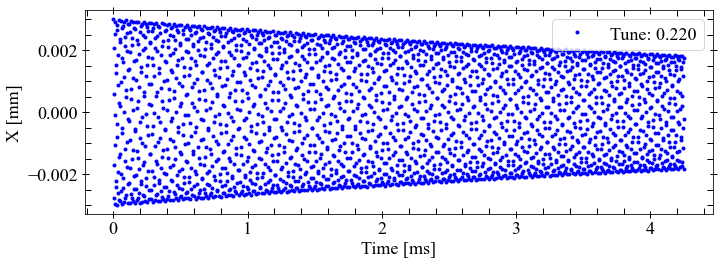

In [9]:
plot_bpm_x(SR, nturns=2500, ref_point=10 , tune=0.22, save=False)

Drift:
	FamName : d2
	Length : 0.11
	PassMethod : DriftPass 0.01717785


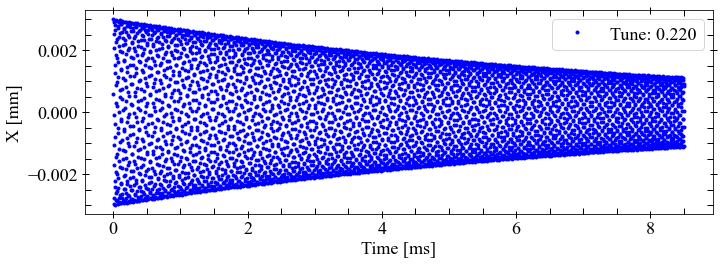

In [11]:
damp, xx = plot_bpm_x(SR, 5000, 101, 0.27, False)

In [10]:
[elemdata0, beamdata, elemdata] = at.get_optics(SR, get_chrom=True)
print(beamdata.tune)
print(beamdata.chromaticity)

[0.21806674 0.21380821]
[-137.61727509  -53.18391197]


In [20]:
refqf = at.get_cells(SR, 'FamName', 'q*')   # FamName attribute == QF
#print(list(mba[refqf]))
refqd = at.get_cells(SR, 'FamName', 'q2')   # FamName attribute == QD
#print(list(mba[refqd]))
refbends = at.get_cells(SR, 'BendingAngle') # Existing BendingAngle attribute
#print(list(mba[refbends]))

In [21]:
refq1 = at.get_cells(SR, at.checktype(at.Quadrupole))   # class == Quadrupole
#print(list(SR[refq1]))
refq2 = at.get_cells(SR, at.checkname('q[12345]'))         # name matches a pattern
#print(list(SR[refq2]))
refbends = at.get_cells(SR, 'BendingAngle') # Existing BendingAngle attribute
#print(list(mba[refbends]))

In [23]:
for elem in SR.select(refq2 | refbends):
    print(elem)

Quadrupole:
	FamName : q5
	Length : 0.12
	PassMethod : StrMPoleSymplectic4Pass
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [ 0.       -6.590778]
	K : -6.590778
Quadrupole:
	FamName : q4
	Length : 0.15
	PassMethod : StrMPoleSymplectic4Pass
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [ 0. 10.]
	K : 10.0
Quadrupole:
	FamName : q3
	Length : 0.12
	PassMethod : StrMPoleSymplectic4Pass
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [0.       5.344311]
	K : 5.344311
Quadrupole:
	FamName : q2
	Length : 0.12
	PassMethod : StrMPoleSymplectic4Pass
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [ 0.       -8.097841]
	K : -8.097841
Dipole:
	FamName : bmat
	Length : 0.8
	PassMethod : BndMPoleSymplectic4Pass
	BendingAngle : 0.030682888250060315
	EntranceAngle : 0.0
	ExitAngle : 0.0
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [ 0.       -0.522199]
	K : -0.522199
Quadrupole:
	FamName : q1
	Length : 0.12
	PassMe

In [24]:
m44, _ = at.find_m44(mba,0)
print(m44)

[[ 0.88776316  1.33887394  0.          0.        ]
 [-0.15824983  0.88776316  0.          0.        ]
 [ 0.          0.         -0.45881526  5.27285536]
 [ 0.          0.         -0.14972695 -0.45881526]]


#energy loss 125.8 keV
88.5*3**4/57

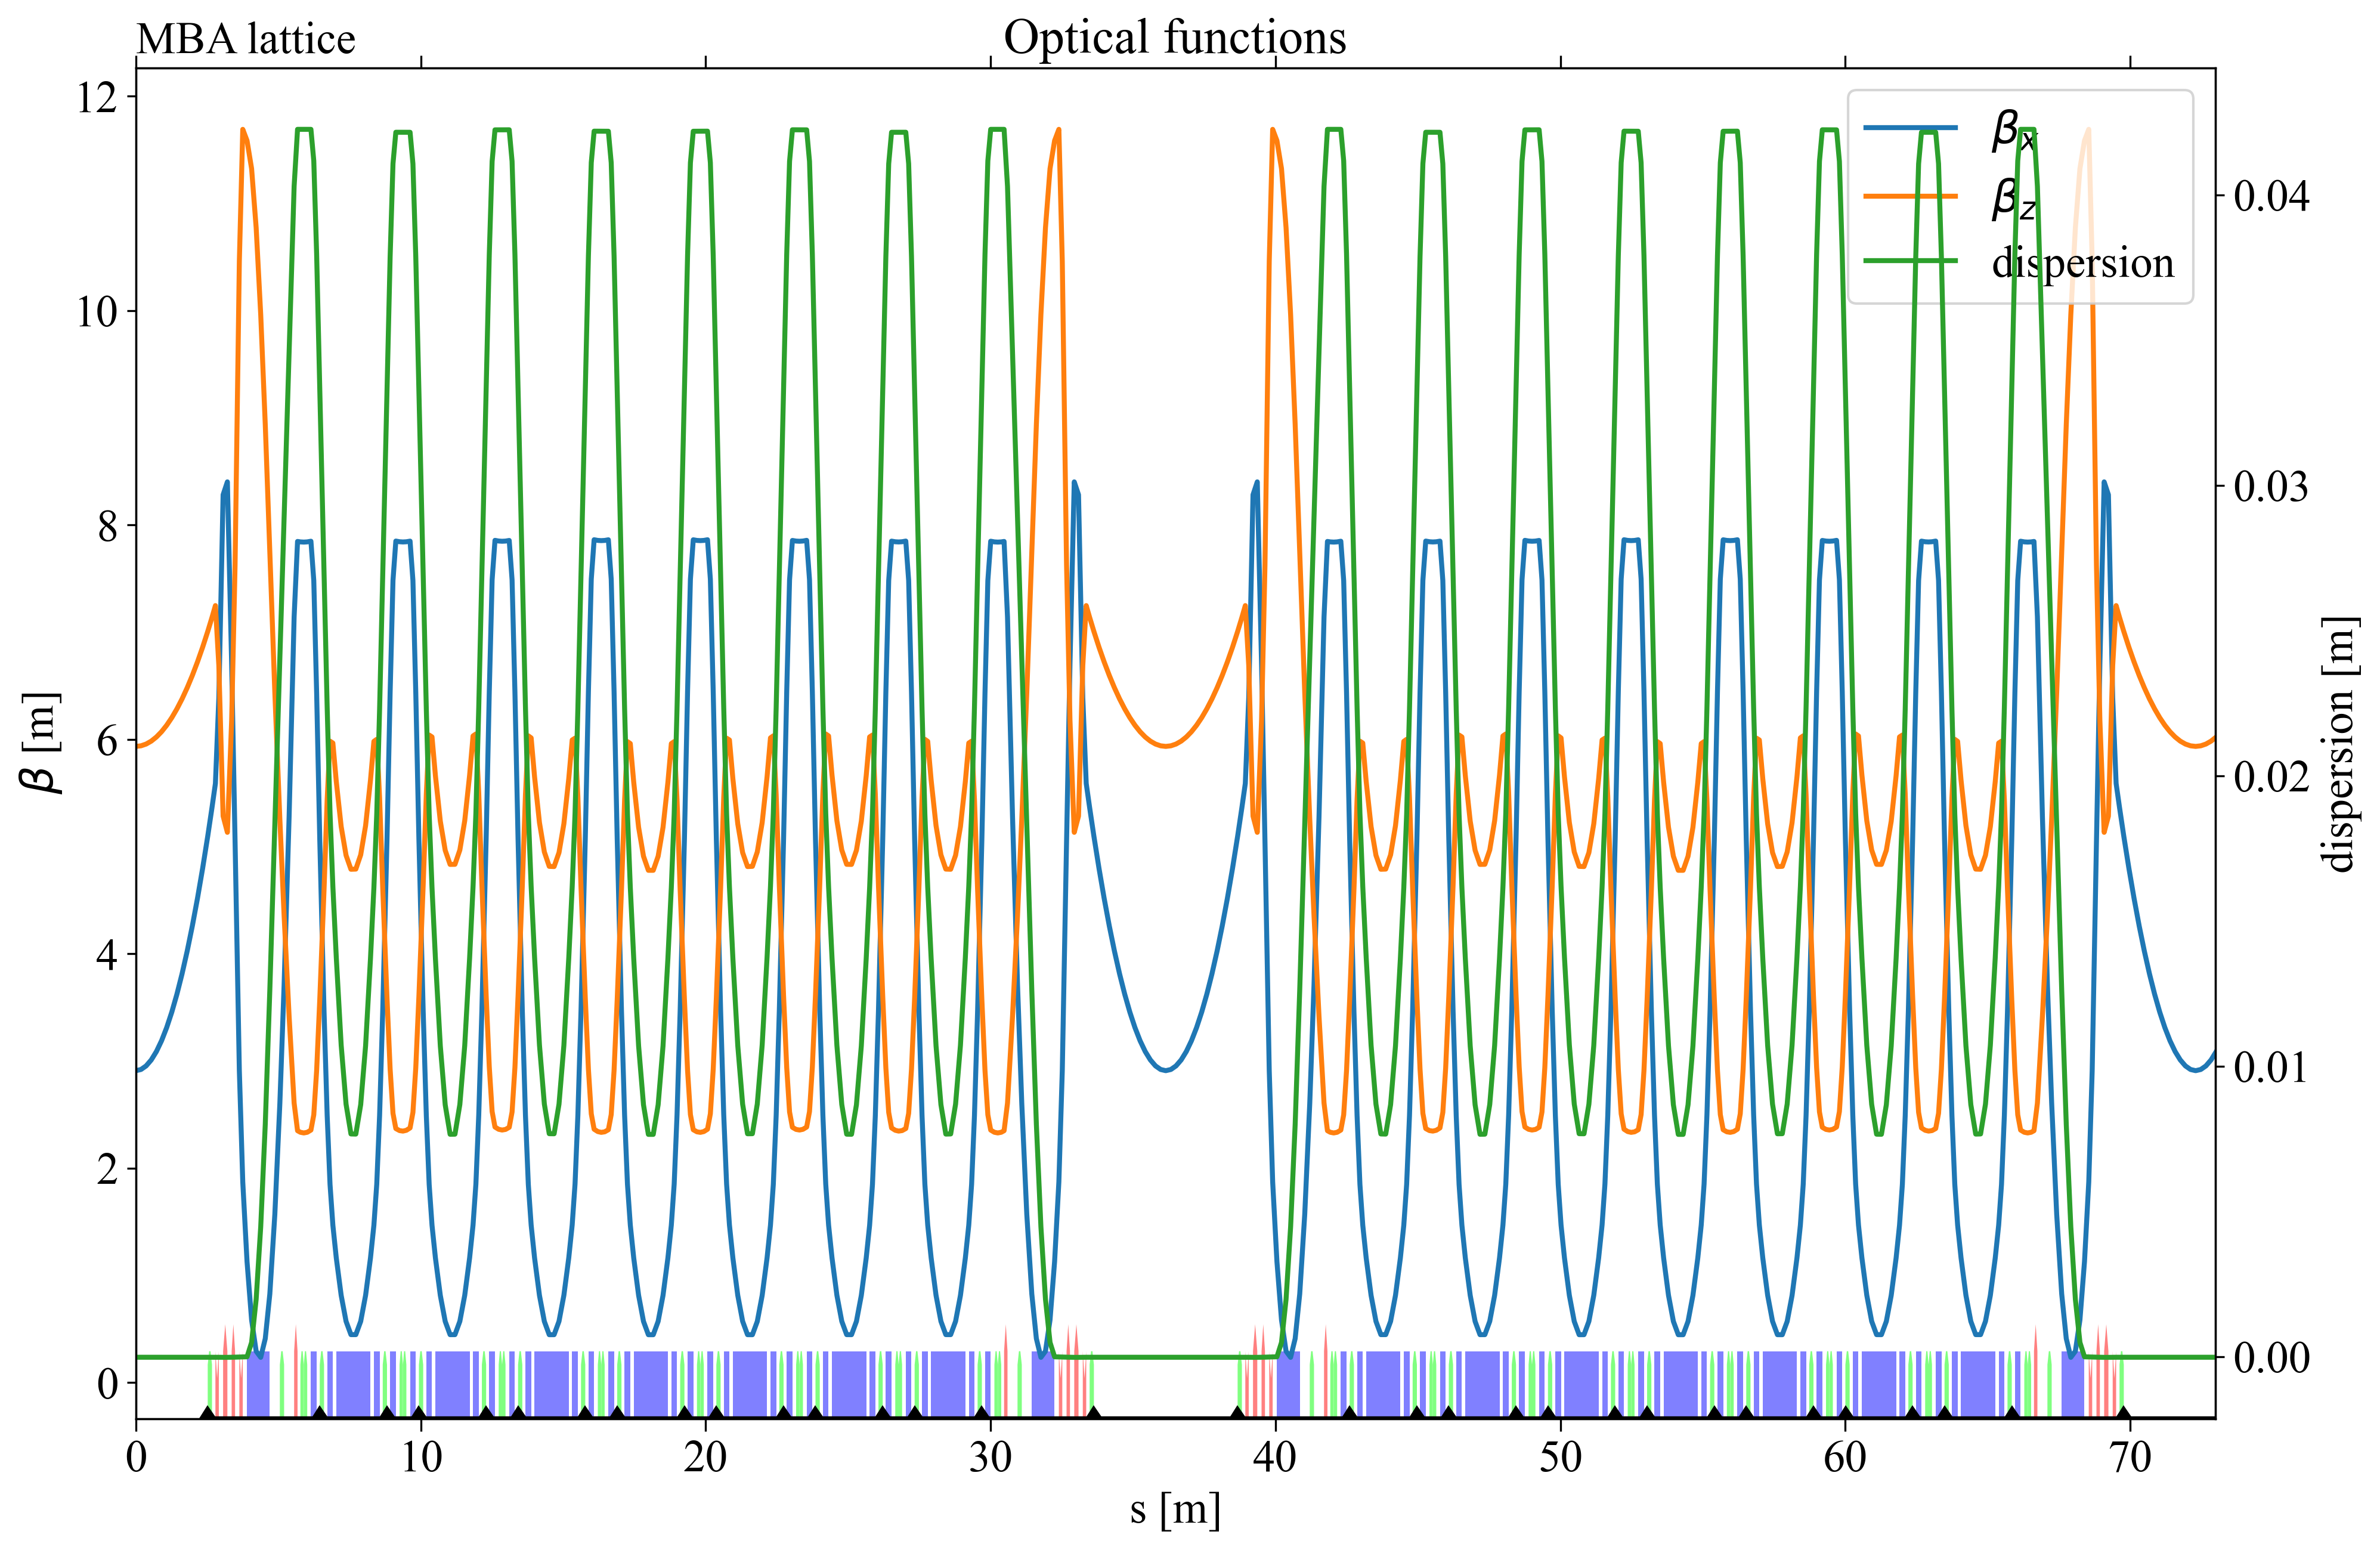

1.2170504611559868e-06

In [15]:
plt.rcParams["figure.figsize"] = [15.0, 10.0]
plt.rcParams["figure.dpi"] = 300
at.plot.plot_beta(SR, s_range=[0,73], dp=0.00001 )
betx= 1
disx= 0.01
dp = 0.00001
bety = 5
sig_x = np.sqrt(betx*2.96242365e-11 + (disx*dp)**2)
sig_y = np.sqrt(bety*2.96242365e-11*0.01)
sig_y
#plt.savefig('mba_lat.eps', dpi=300)
#plt.savefig('mba_lat.png', dpi=600)


RFC = at.RFCavity('RFC', 0.00, 1e6, 500e6, 100, 3.0E9, PassMethod='IdentityPass')
mba.insert(0, RFC)
#FODOSext.harmonic_number=100
print(RFC)

In [16]:
at.fit_tune(SR, refq1, refq2, [0.20, 0.28])


Fitting Tune...
Initial value [0.21806674 0.21380821]
iter# 0 Res. 0.004724600500059612
iter# 1 Res. 0.004861660040412472
iter# 2 Res. 0.004864264685235331
Final value [0.13352259 0.30109546] 



In [17]:
refs1 = at.get_cells(SR, at.checktype(at.Sextupole))   # class == Quadrupole
#print(list(mba[refs1]))
refs2 = at.get_cells(SR, at.checkname('s[24]'))         # name matches a pattern
#print(list(mba[refs2]))

In [18]:
refsext = at.get_cells(SR, at.checktype(at.Sextupole)) # Select all sextpoles
refsf,refsd = np.flatnonzero(refsext)[3:5]                    # Take the 1st ones

at.fit_chrom(SR, refsf, refsd, [0.35, 0.5])


Fitting Chromaticity...
Initial value [-137.71523379  -53.06021981]
iter# 0 Res. 12.297691898332207
iter# 1 Res. 0.0003368409648677546
iter# 2 Res. 8.165062159941926e-08
Final value [0.35027406 0.49991912] 



In [19]:
[elemdata0, beamdata, elemdata] = at.get_optics(SR, get_chrom=True)
print(beamdata.tune)
print(beamdata.chromaticity)

[0.13352259 0.30109548]
[0.35027406 0.49991912]


In [20]:
print(SR[refsext])

Lattice(<544 elements>, name='MBA lattice', energy=3000000000.0, particle=Particle('relativistic'), periodicity=1, beam_current=0.22, nbunch=1)


In [22]:
RFC = at.RFCavity('RFC', 0.0, 128e3, 0.0, 100, 3.0E9, PassMethod='IdentityPass')
SR.insert(0, RFC)
SR.harmonic_number=228
SR.set_cavity(Voltage=128.0e5, Frequency=at.Frf.NOMINAL)
print(SR[1], RFC)

Marker:
	FamName : GIRDER
	Length : 0.0
	PassMethod : IdentityPass RFCavity:
	FamName : RFC
	Length : 0.0
	PassMethod : IdentityPass
	Voltage : 12800000.0
	Frequency : 118175424.09672467
	HarmNumber : 100
	Energy : 3000000000.0
	TimeLag : 0.0


In [23]:
print(at.radiation_parameters(SR))

              Frac. tunes: [0.13352259 0.30109548 0.00343287]
                    Tunes: [65.13352259 21.30109548]
           Chromaticities: [0.35027406 0.49991912]
 Momentum compact. factor: 7.616366e-05
              Slip factor: -7.613465e-05
                   Energy: 3.000000e+09 eV
       Energy loss / turn: 2.884723e+05 eV
 Radiation integrals - I1: 0.0440530730314225 m
                       I2: 0.2529522746080848 m^-1
                       I3: 0.00915194645501334 m^-2
                       I4: -0.337972491024495 m^-1
                       I5: 1.3334193889424908e-06 m^-1
          Mode emittances: [2.98027002e-11            nan 1.46951456e-06]
Damping partition numbers: [2.33611169 1.         0.66388831]
            Damping times: [0.01717755 0.04012867 0.06044492] s
            Energy spread: 0.0008484
             Bunch length: 0.0017321 m
         Cavities voltage: 12800000.0 V
        Synchrotron phase: 3.11905 rd
    Synchrotron frequency: 1779.3 Hz


In [137]:
#dir(at)
boundary,tracked, survived=at.get_momentum_acceptance(SR, 1e-6, 1e-3, nturns=50, dp=0.00001, refpts=refq1, grid_mode='CARTESIAN')


(array([[-0.00213379,  0.00079688],
        [-0.00213379,  0.00079688],
        [-0.00213379,  0.00079688],
        [-0.00213379,  0.00079688],
        [-0.00099902,  0.00100293],
        [-0.00095996,  0.00101758],
        [-0.00212793,  0.00079785],
        [-0.00212793,  0.00079785],
        [-0.00212793,  0.00079785],
        [-0.00212793,  0.00079785],
        [-0.00212793,  0.00079785],
        [-0.00212793,  0.00079785],
        [-0.00212793,  0.00079785],
        [-0.00212793,  0.00079785],
        [-0.00189453,  0.00099512],
        [-0.0010459 ,  0.00099902],
        [-0.00326074,  0.00079883],
        [-0.00326074,  0.00079883],
        [-0.00326074,  0.00079883],
        [-0.00326074,  0.00079883],
        [-0.00326074,  0.00079883],
        [-0.00326074,  0.00079883],
        [-0.00326074,  0.00079883],
        [-0.00326074,  0.00079883],
        [-0.00093555,  0.00091406],
        [-0.0009707 ,  0.00099609],
        [-0.00326465,  0.00079395],
        [-0.00326465,  0.000

In [24]:
boundaryY,trackedY, survivedY = at.get_vertical_acceptance(SR, 1e-6, 1e-3,nturns=100, dp=0.00001,
                                                           refpts=refq1, grid_mode='CARTESIAN')


In [31]:
boundaryX,trackedX, survivedX = at.get_horizontal_acceptance(SR, 1e-6, 1e-3,nturns=100, dp=0.00001,
                                                           refpts=refq1, grid_mode='CARTESIAN')

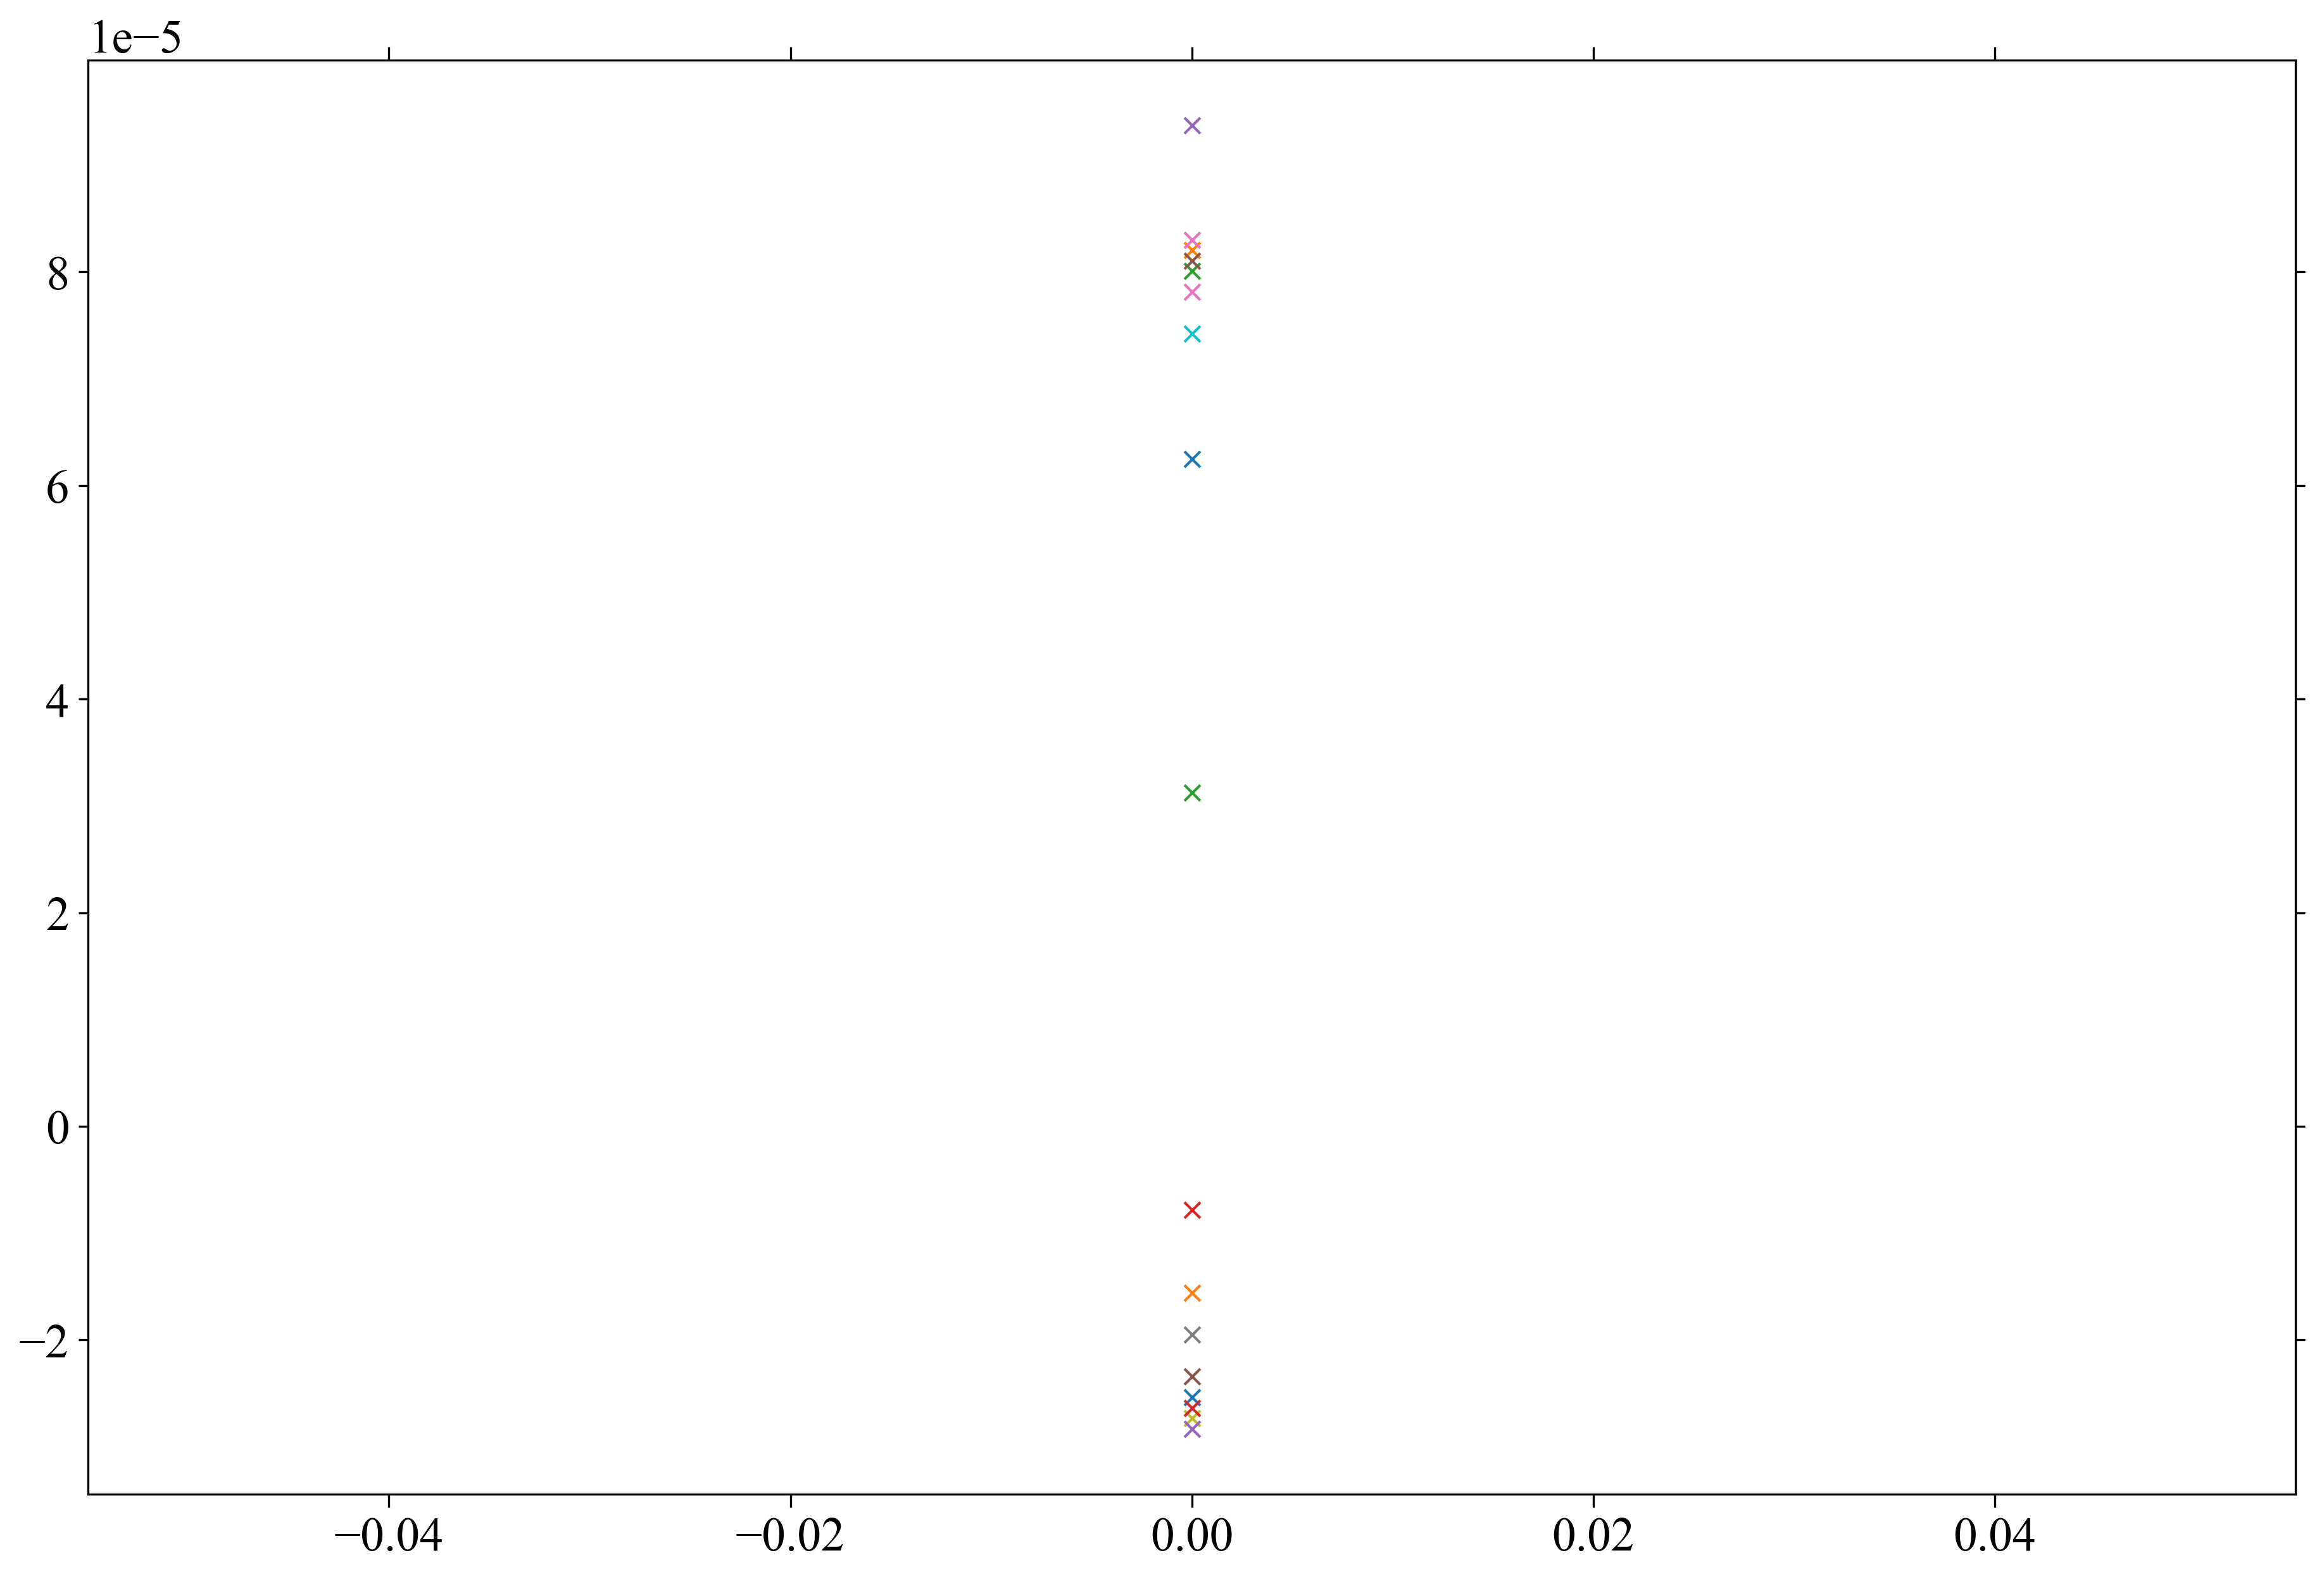

In [45]:
plt.plot(trackedX[10], marker='x', ls='none')

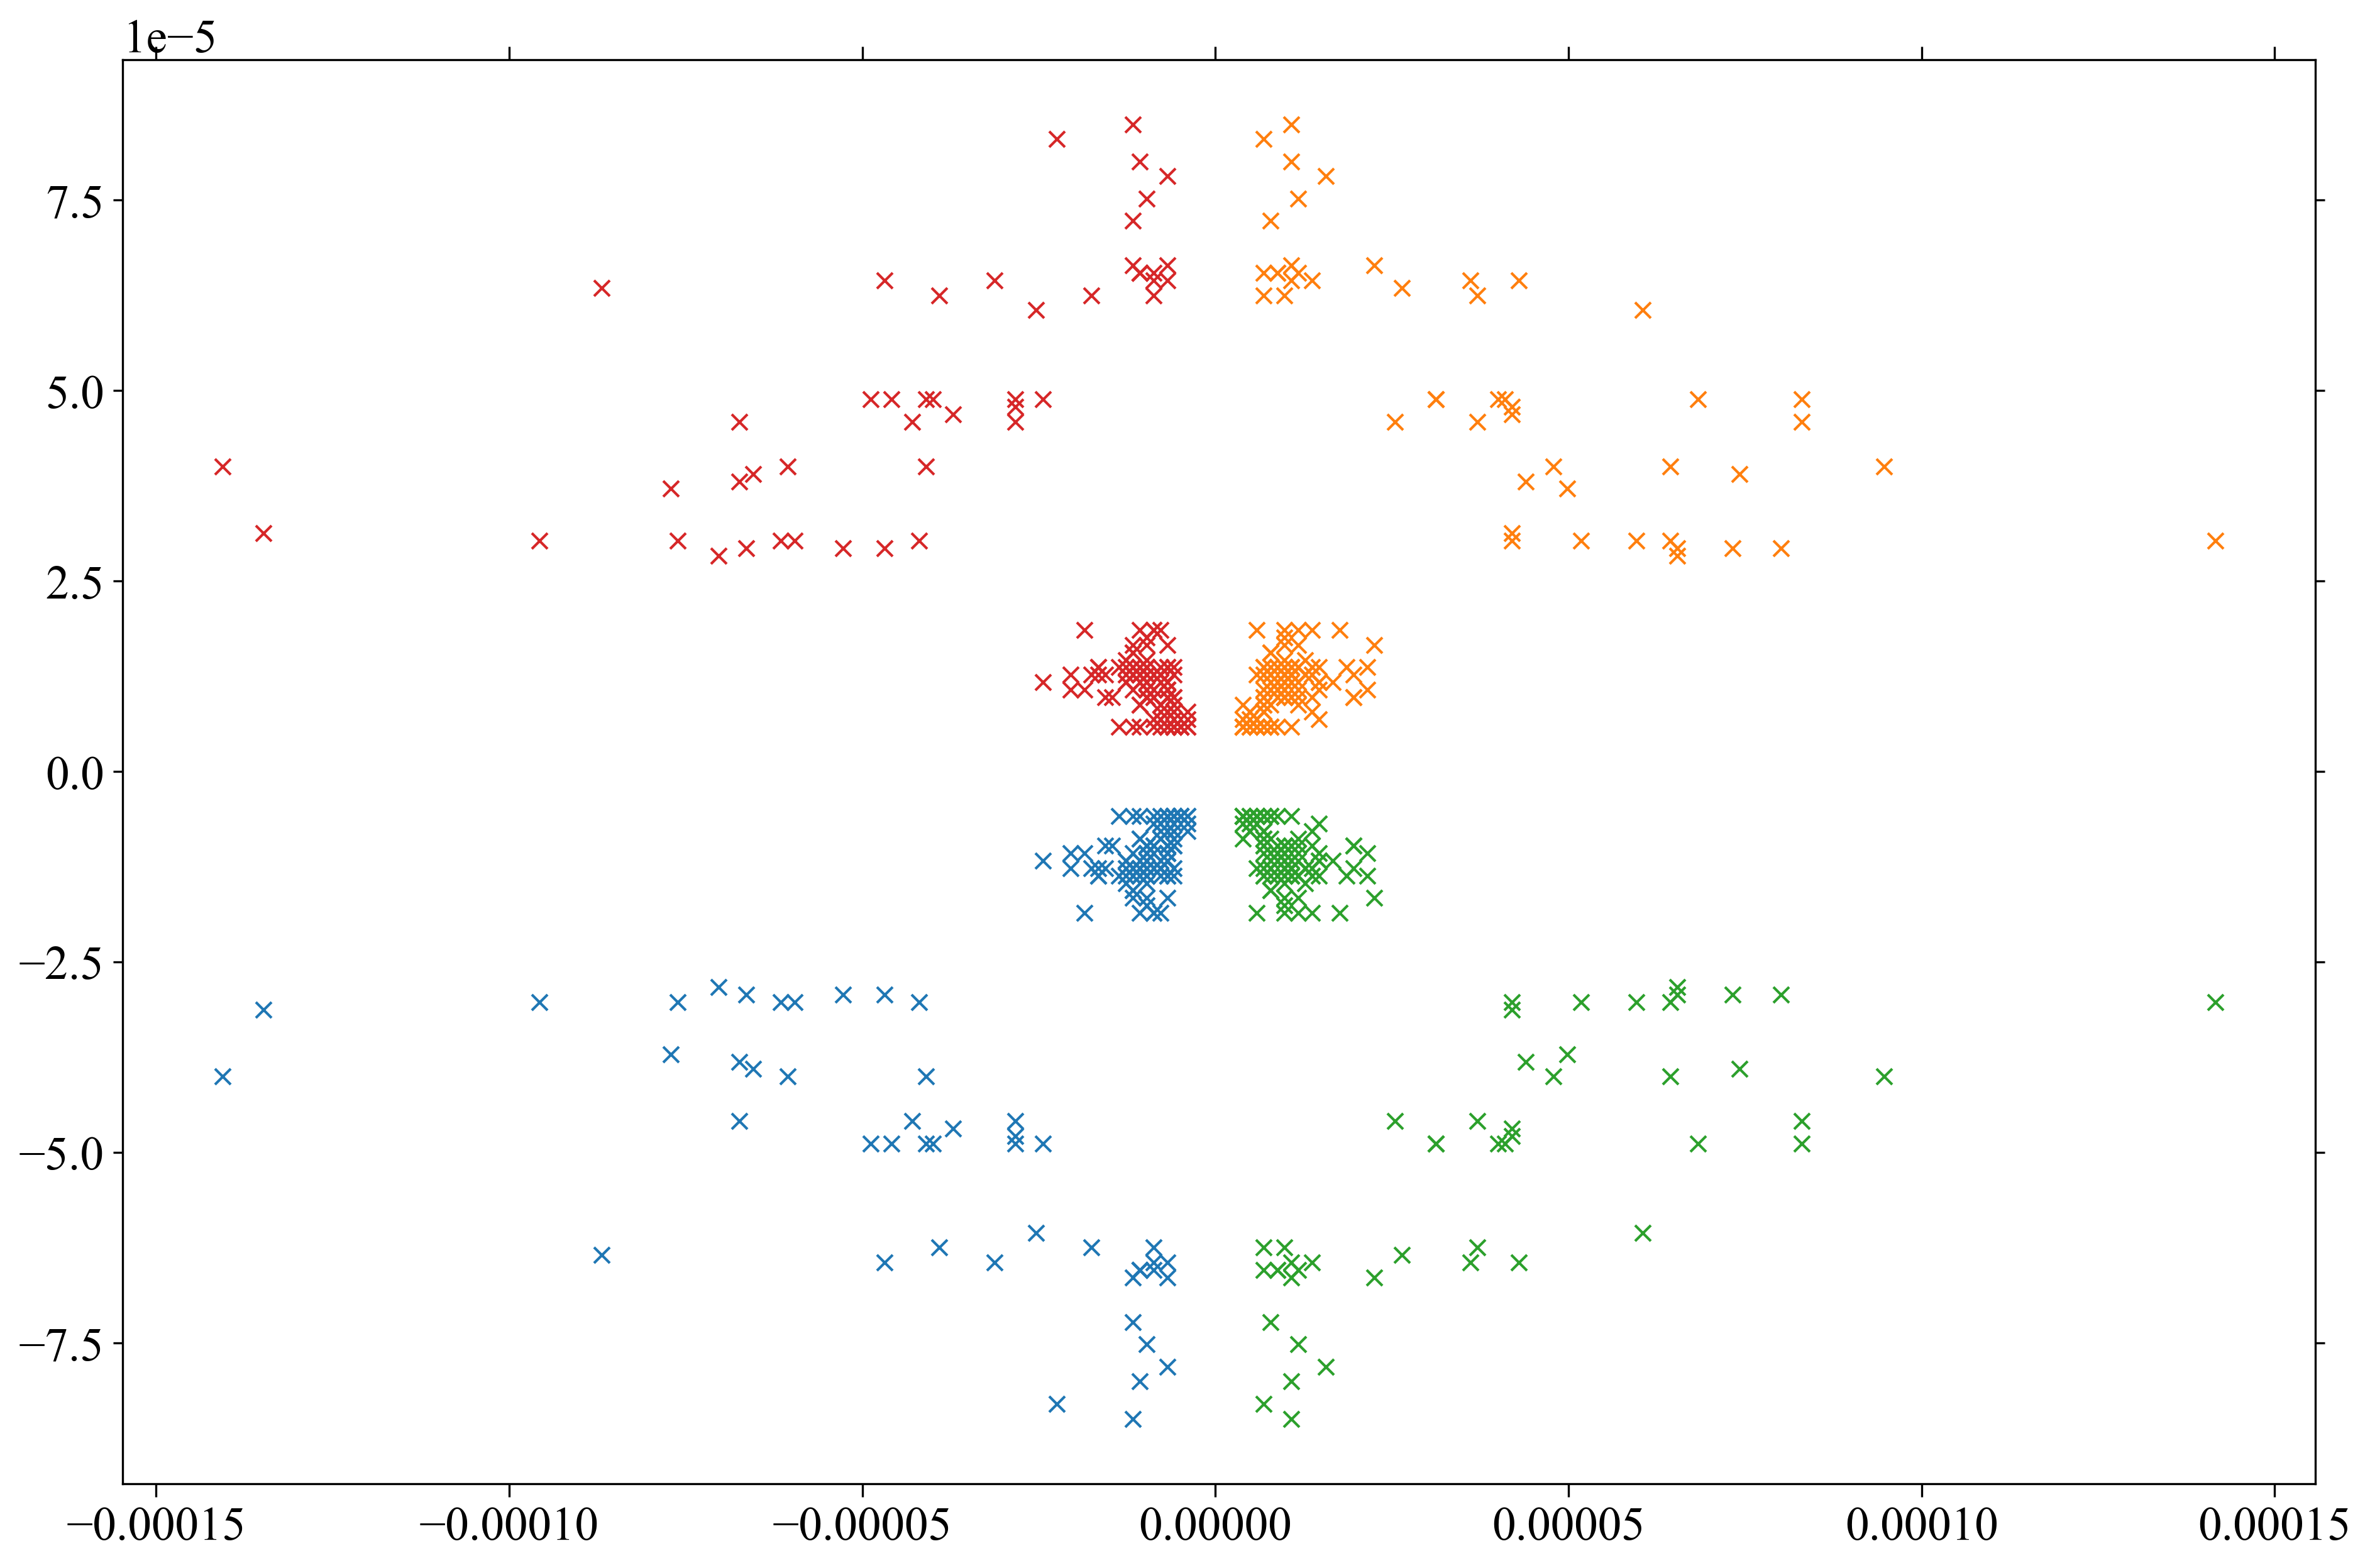

In [52]:
plt.plot(boundaryX[:,0],boundaryY[:,0], marker='x', ls='none')
plt.plot(boundaryX[:,1],boundaryY[:,1], marker='x', ls='none')
plt.plot(boundaryX[:,1],boundaryY[:,0], marker='x', ls='none')
plt.plot(boundaryX[:,0],boundaryY[:,1], marker='x', ls='none')

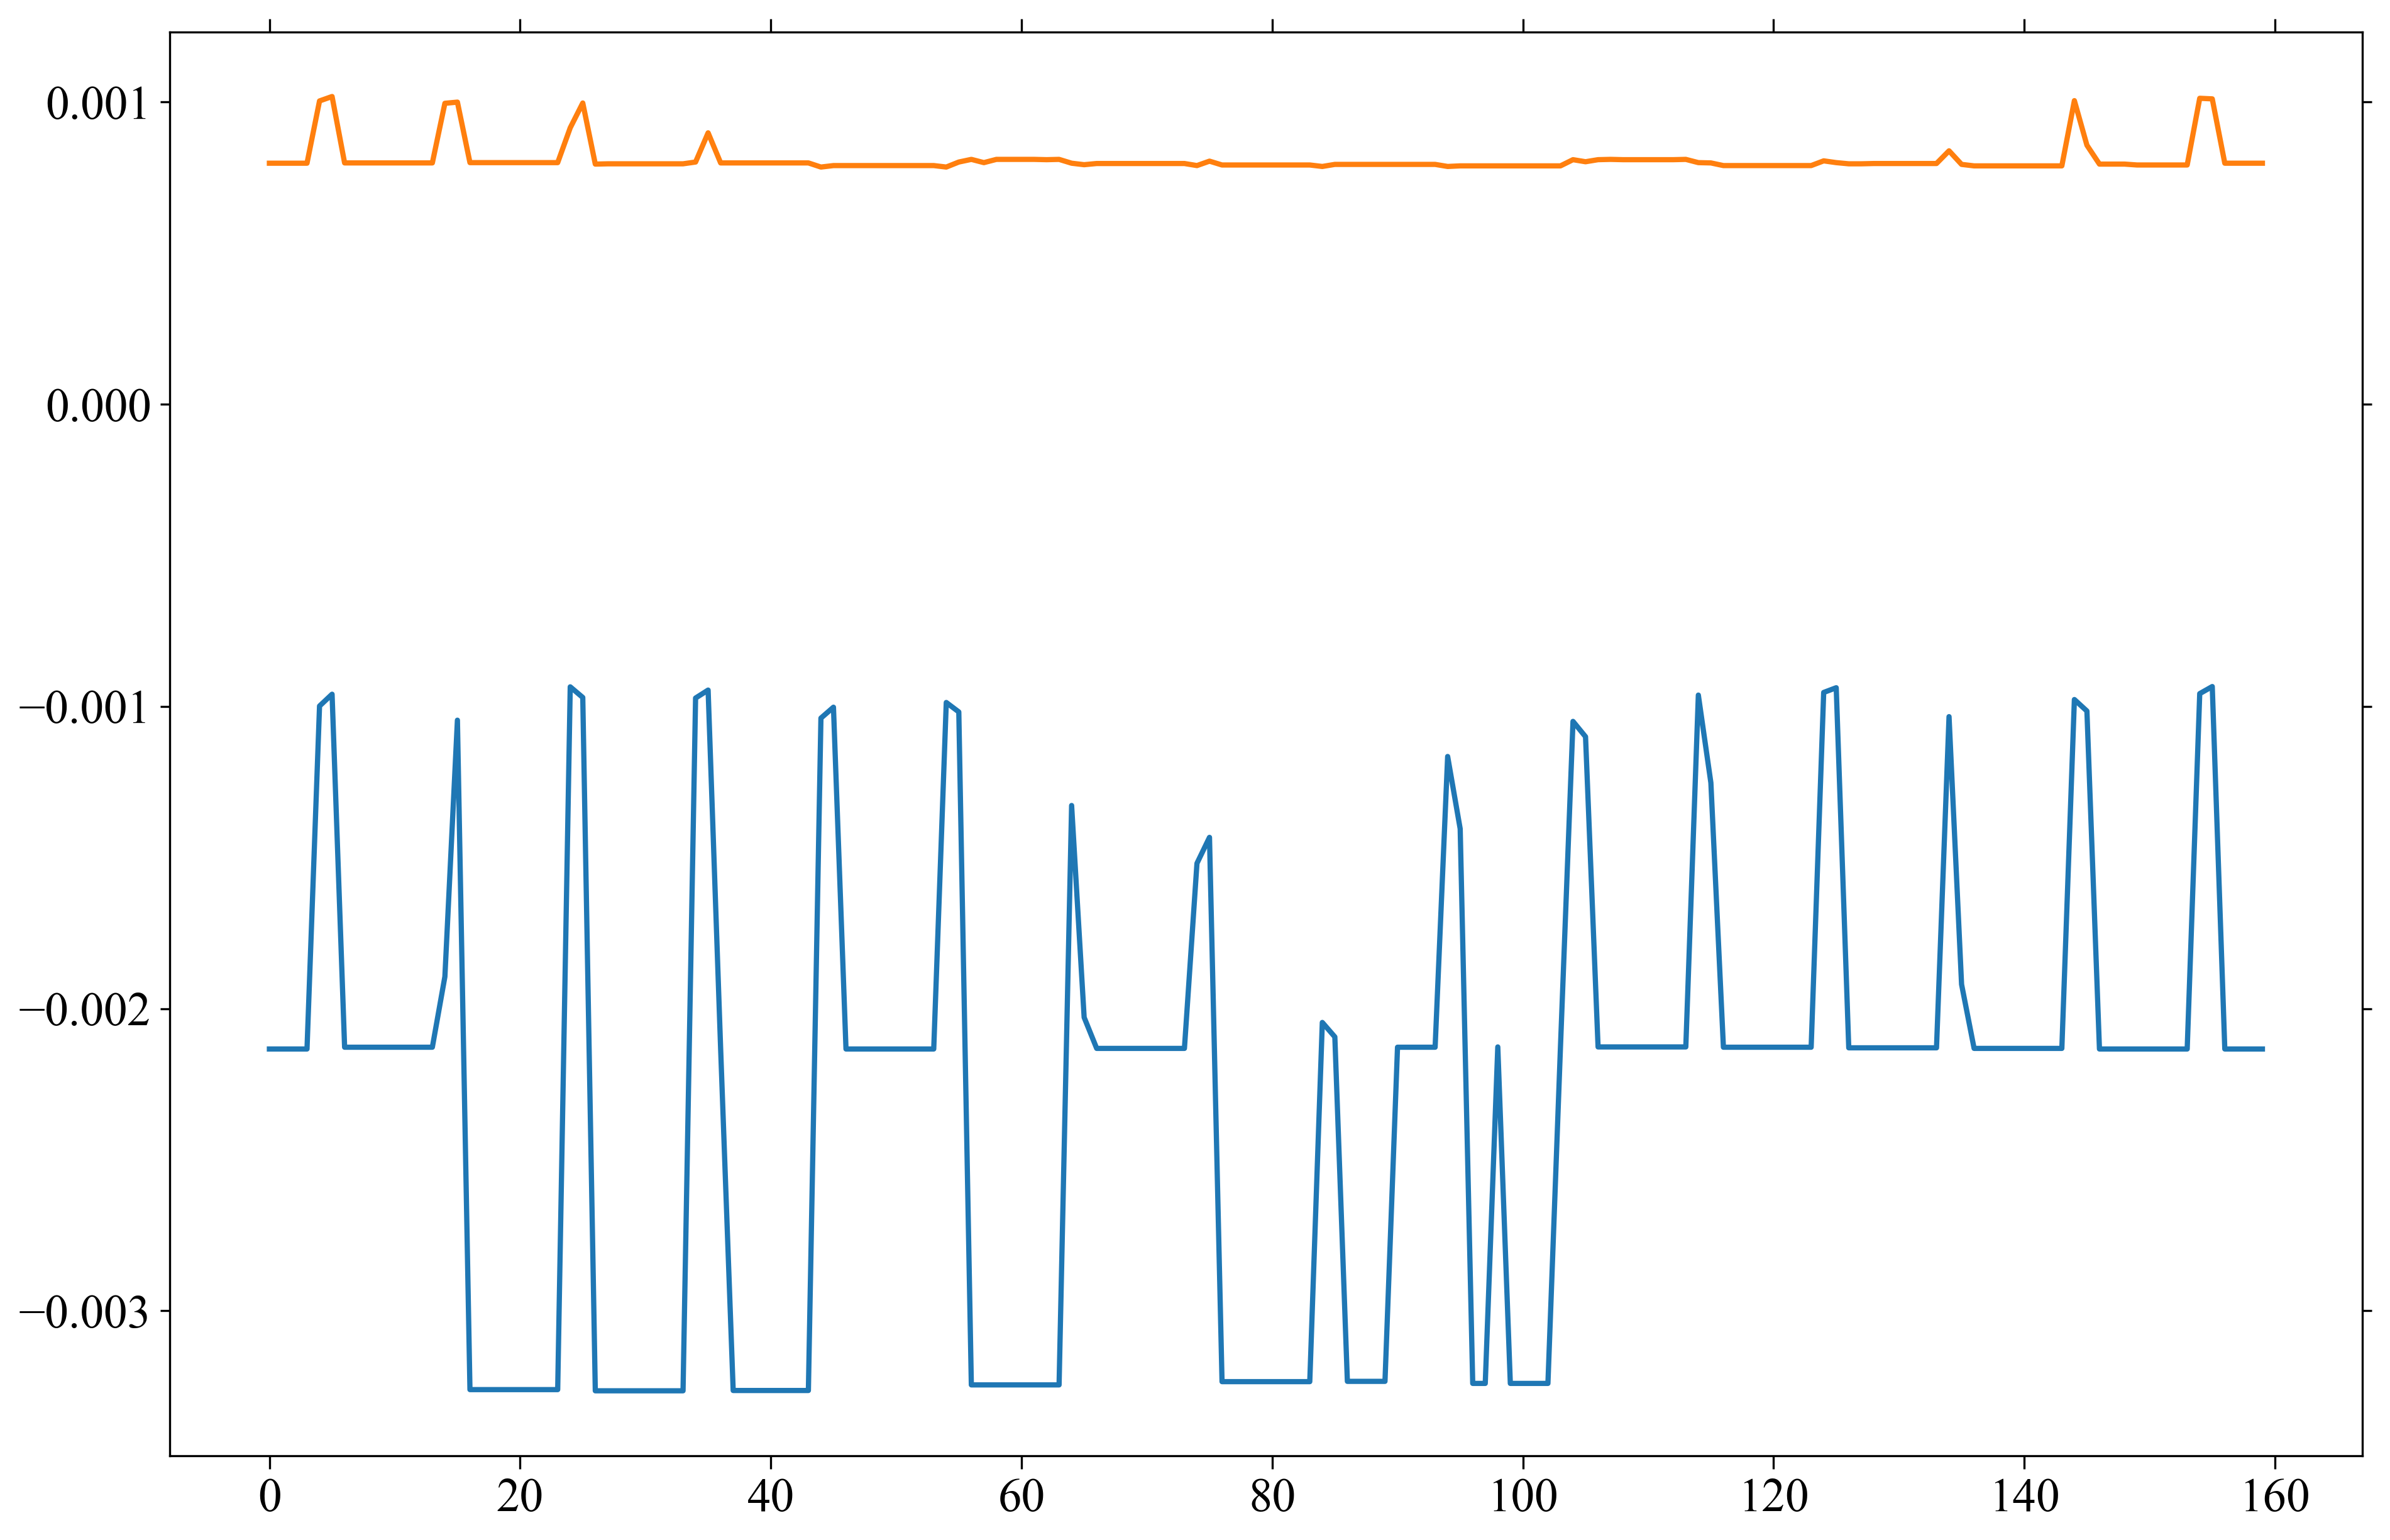

In [142]:
plt.plot(boundary)#,tracked, survived

In [119]:

emit, beamdata, emit0= at.ohmi_envelope(SR, refpts=150, orbit=np.array([20e-6, 0, 200e-6, 0, 0, 0]) )
emit.emitXYZ


array([6.38978700e-10, 5.89424220e-10, 1.22900469e-06])

In [67]:
print(at.envelope_parameters(SR))

  Frac. tunes (6D motion): [0.2362648  0.20436105 0.00343028]
                   Energy: 3.000000e+09 eV
       Energy loss / turn: 2.884723e+05 eV
          Mode emittances: [2.96190268e-11 1.06102869e-37 1.46804225e-06]
Damping partition numbers: [2.33544698 1.00070324 0.66384978]
            Damping times: [0.01717785 0.04008977 0.0604323 ] s
            Energy spread: 0.000848327
             Bunch length: 0.00173061 m
         Cavities voltage: 12800000.0 V
        Synchrotron phase: 3.11905 rd
    Synchrotron frequency: 1777.96 Hz
